### Problem 1: Business Part (20 points)
As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on. Pick one of the markets for further consideration, and design a new service  which you believe to be important in the market. Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve. Why the problem is important to solve? Why you believe you could make a big difference with data science technology. How are you planing to persuade the investors to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Why is your business problem?
In the global wine market, there are so many products and it's an international market. Consumers face products from all over the world, and the price of wine varies a lot. When choosing a wine, consumers usually get confused about all those different wineries, types of wines, and the price. Based on this condition, we want to help wine consumers to find out the most valuable products.

2) Why is the problem important to solve? 
Global wine industry is a large industry. It has a revenue of $327,140.5 million, and the profit rate is 11.2% . The number of wine consumers is growing, and customers are confused with hundreds of thousands of products in the market. So, we are going to help consumers get the knowledge about wines and choose suitable products for them.

3) What is your idea to solve the problem? 
We want to find what factors could influence the price of wines. We analyze the whole data set, and find the price trend of wines made in different countries, years, made from different typies of grapes and based on the description(reviews). After analyzing the trend, we can give recommendations for wine consumers.

4) What differences could you make with your data science approach?
Based on this 130k data set, we can have a good insight into the wine produced in the market. We can educate wine consumers with these insights, and give them knowledge from a large data view. Then they will have a systematic understanding about wine products.

5) Why do you believe the idea deserves the investment of the "Shark Tank"?
We build up a model to find the factors that influence the wine price, and in the future we plan to build an application that would help in easy interpretation of the same. Our first step into market is to get consumers, educate them the knowledge about wine, and build a relationship with consumers. After building a consumer base, we can give recommendations to consumers, and gain revenue by advertising. We would like to launch this wine recognizing APP in the market, and revolutionize the global market trends in wine purchase.

### Problem 2: Math Part (20 points)

Define the business problem as a math problem and design a math solution to the problem.


**Insert your answers here**

1) Problem formulation in Math:

2) Math Solution:

3) Implementation of the Solution

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from subprocess import check_output

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

#from wordcloud import WordCloud, STOPWORDS
#import libraries


In [4]:
wine = pd.read_csv('C:/Spring19/DS501_IntrotoDS/Case Study Assignment 4/wine-reviews/wine-reviews/winemag-data-130k-v2.csv')
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


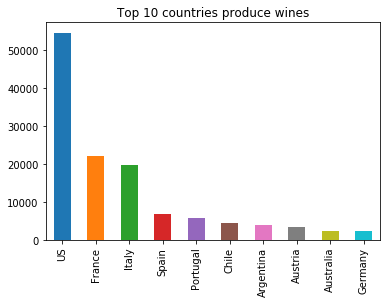

In [5]:
wine['country'].value_counts().head(10).plot.bar(
title = "Top 10 countries produce wines")

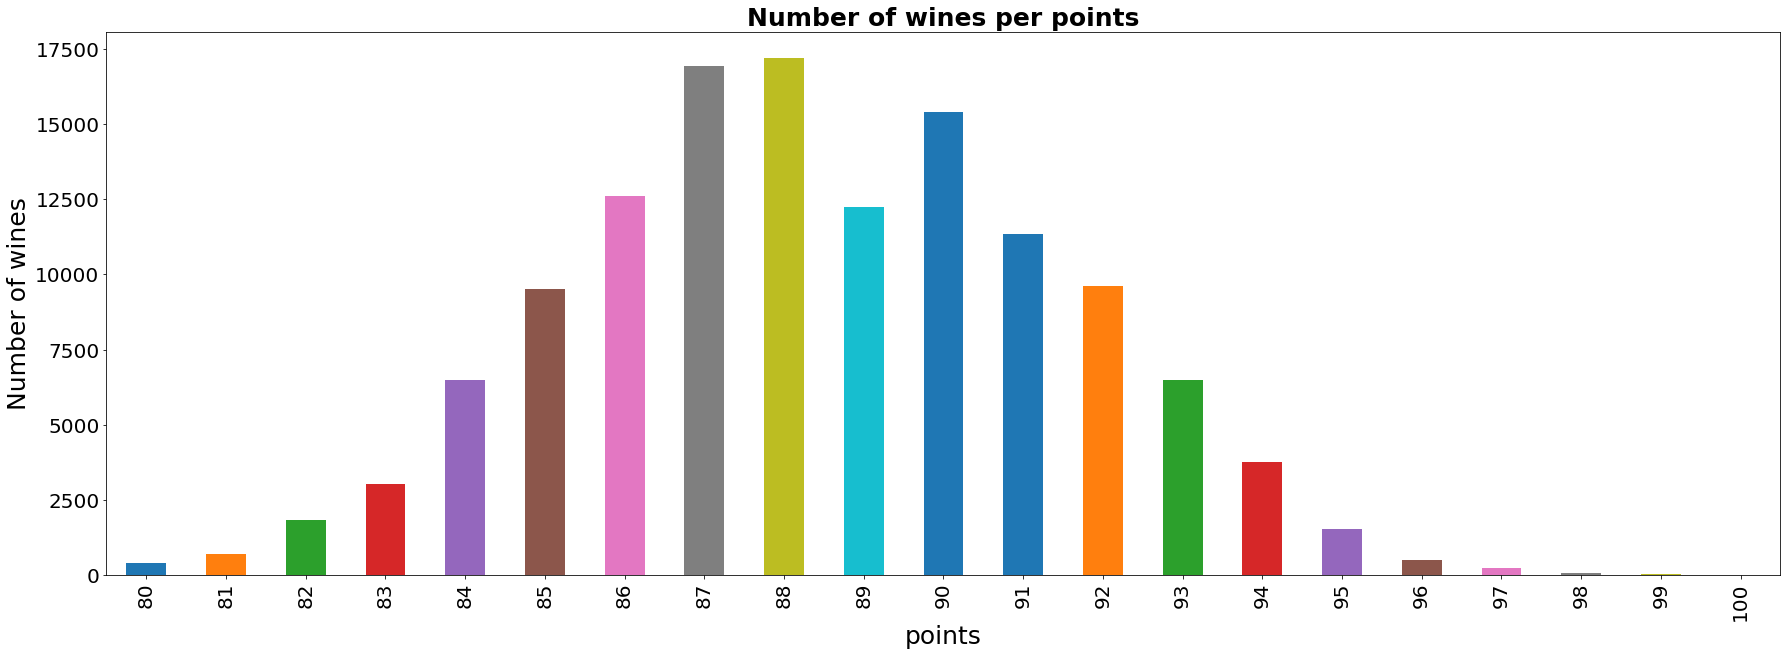

In [6]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of wines per points', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of wines', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
wine.groupby(['points']).count()['description'].plot(ax=ax, kind='bar')

C:\Users\AishRamPrad\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


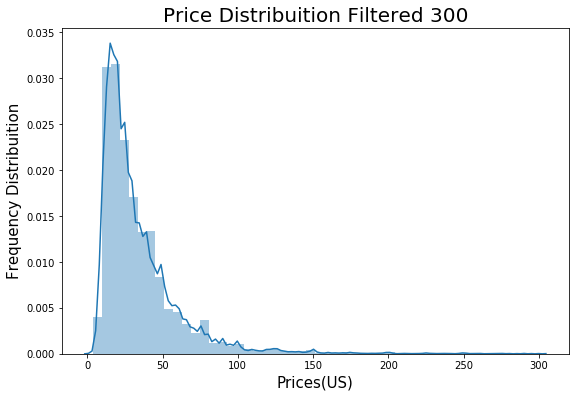

In [7]:
# to see the distribution of price value
plt.figure(figsize=(20,6))

g = plt.subplot(121)
g = sns.distplot(wine[wine['price'] < 300]['price'])
g.set_title("Price Distribuition Filtered 300", fontsize=20)
g.set_xlabel("Prices(US)", fontsize=15)
g.set_ylabel("Frequency Distribuition", fontsize=15)


plt.show()

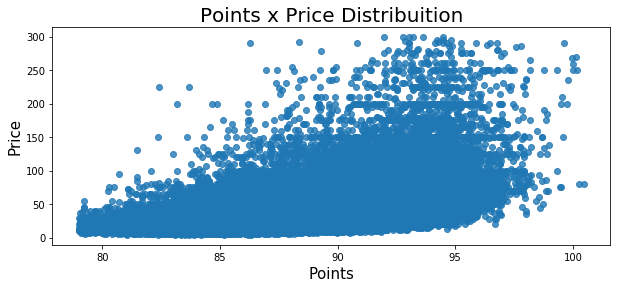

In [8]:
#to see Points crossed by Prices under 300
plt.figure(figsize=(10,4))
price300=wine['price'] < 300
df_price300=wine[price300]
g = sns.regplot(x='points', y='price', data=df_price300, x_jitter=True, fit_reg=False)
g.set_title("Points x Price Distribuition", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price", fontsize= 15)

plt.show()

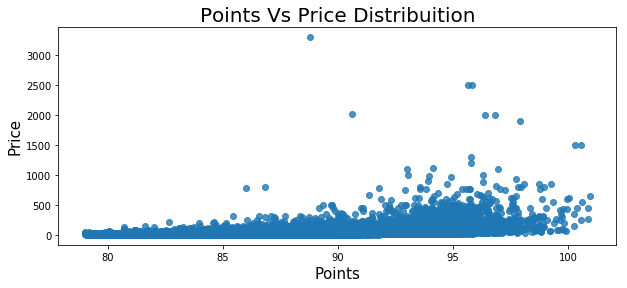

In [9]:
# to see Points crossed by Prices
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price', data=wine, x_jitter=True, fit_reg=False)
g.set_title("Points Vs Price Distribuition", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price", fontsize= 15)

plt.show()

Results show that: 
1. The highest values isn't of the wine with highest popularity (around 45 usd)
2. Higher points are prone to be given to expensive wines relatively.
3. Ratings for approachable wines (under 50 USD) varies from 80 to 95.It shows that most people may have different expectations from wines, approachable price seems more easy to please the "Taster", generally.

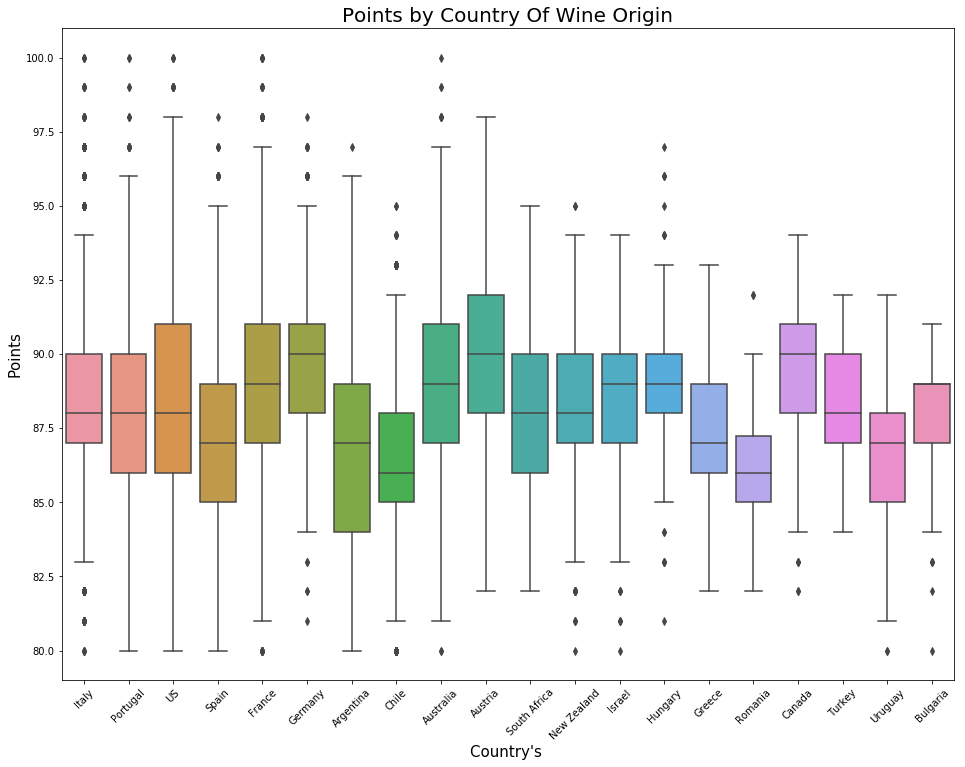

In [10]:
# to see the boxplot by price and points
plt.figure(figsize=(16,12))
country = wine.country.value_counts()[:20] # only for top 20 countries by price and points

g1 = sns.boxplot(x='country', y='points',
                   data=wine[wine.country.isin(country.index.values)])
g1.set_title("Points by Country Of Wine Origin", fontsize=20)
g1.set_xlabel("Country's ", fontsize=15)
g1.set_ylabel("Points", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.show()

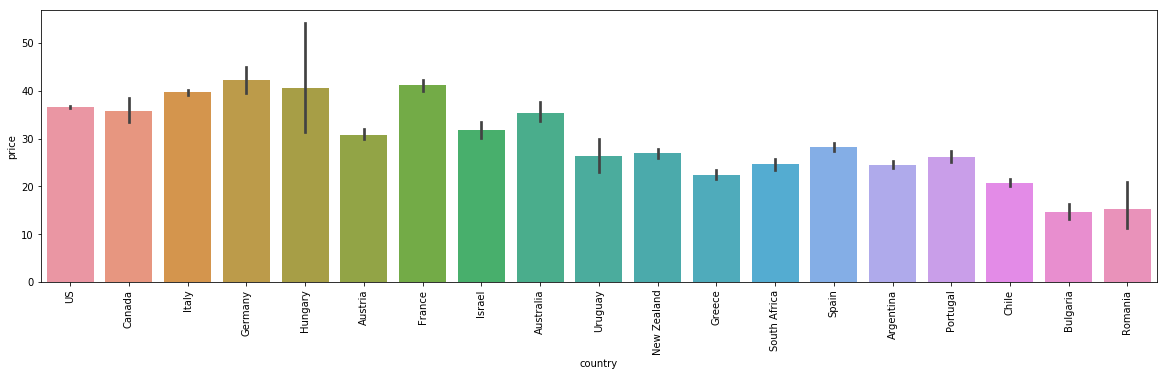

In [11]:
#country=wine.groupby('country').filter(lambda x: len(x) >100)
country=wine.groupby('country').filter(lambda x: len(x) >100)
df1 = pd.DataFrame({col:vals['price'] for col,vals in country.groupby('country')})
meds1 = df1.median()
meds1.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,5))
chart = sns.barplot(x='country',y='price', data=wine, order=meds1.index, ax = ax)
plt.xticks(rotation = 90)
plt.show()

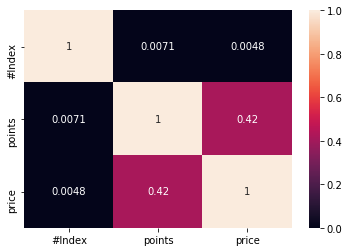

In [12]:
#Correlation Heat Map
df2=wine.rename(columns = {'Unnamed: 0':'#Index'})
df2.corr()
sns.heatmap(df2.corr(),vmax = 1, vmin = 0,annot = True)
plt.show()

In [13]:
df3 = pd.DataFrame({col:vals['points'] for col,vals in wine.groupby('variety')})
meds2 = df3.median()
meds2.sort_values(ascending=False, inplace=True)


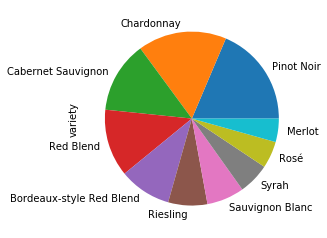

In [14]:
wine['variety'].value_counts().head(10).plot.pie()
# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

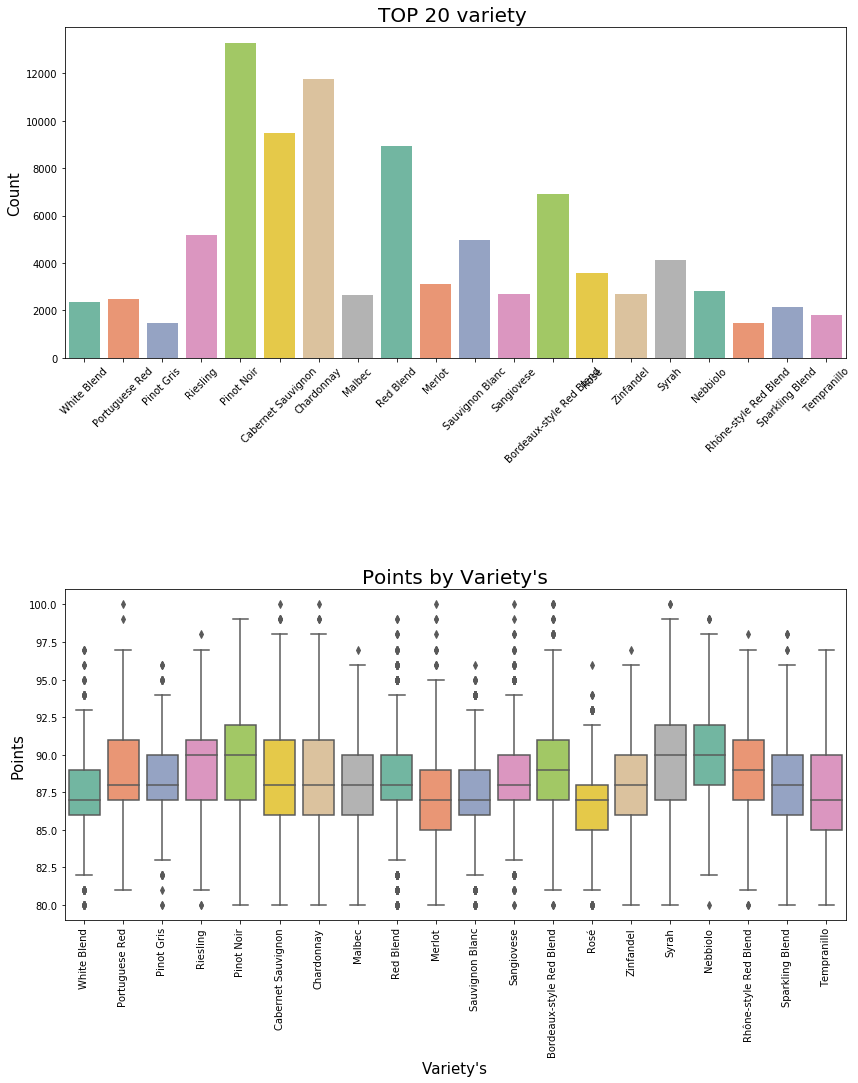

In [15]:
# to see the boxplot by type of wine
plt.figure(figsize=(14,16))

variety = wine.variety.value_counts()[:20]

plt.subplot(2,1,1)
g = sns.countplot(x='variety', 
                  data=wine.loc[(wine.variety.isin(variety.index.values))],
                 palette='Set2')
g.set_title("TOP 20 variety ", fontsize=20)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)


plt.subplot(2,1,2)
g2 = sns.boxplot(y='points', x='variety',
                  data=wine.loc[(wine.variety.isin(variety.index.values))],
                 palette='Set2')
g2.set_title("Points by Variety's", fontsize=20)
g2.set_xlabel("Variety's", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

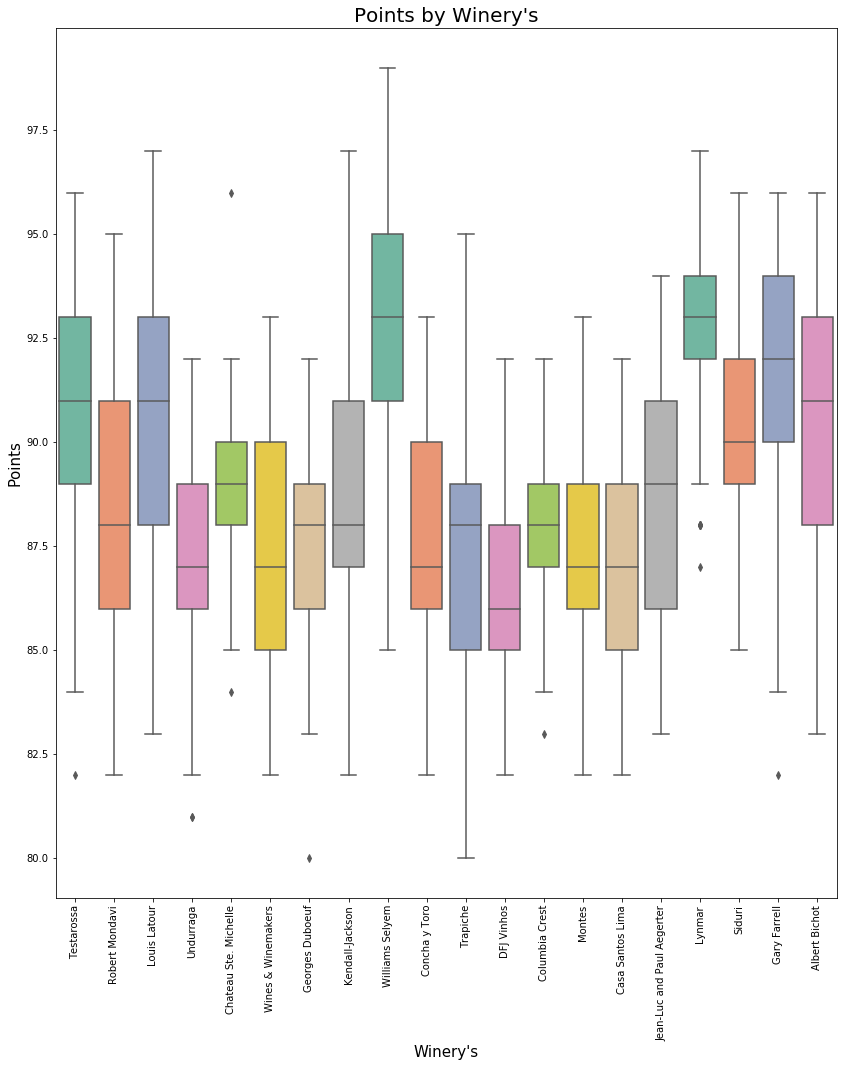

In [16]:
# to see the boxplot of price and winery

plt.figure(figsize=(14,16))

winery = wine.winery.value_counts()[:20]

g2 = sns.boxplot(y='points', x='winery',
                  data=wine.loc[(wine.winery.isin(winery.index.values))],
                 palette='Set2')
g2.set_title("Points by Winery's", fontsize=20)
g2.set_xlabel("Winery's", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)


plt.show()

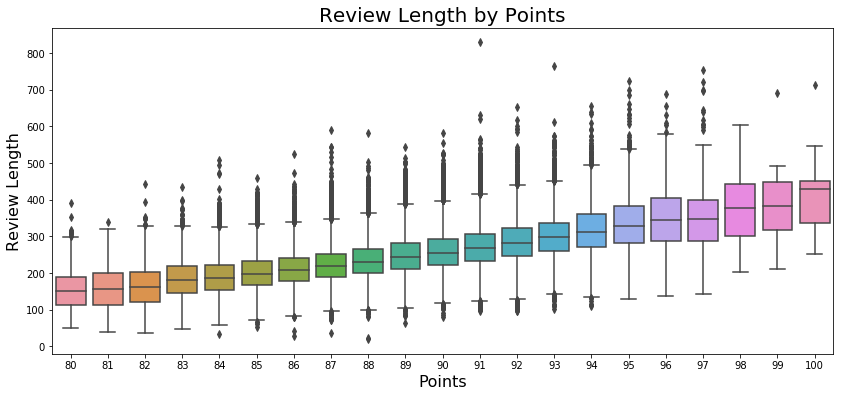

In [17]:
# to see the boxplot of reviews's length and point and price seperately
wine = wine.assign(desc_length = wine['description'].apply(len))

plt.figure(figsize=(14,6))
g = sns.boxplot(x='points', y='desc_length', data=wine)
g.set_title('Review Length by Points', fontsize=20)
g.set_ylabel('Review Length', fontsize = 16) # Y label
g.set_xlabel('Points', fontsize = 16) # X label
plt.show()

#Reviews with more words have higher possibility to be a high scored wine.

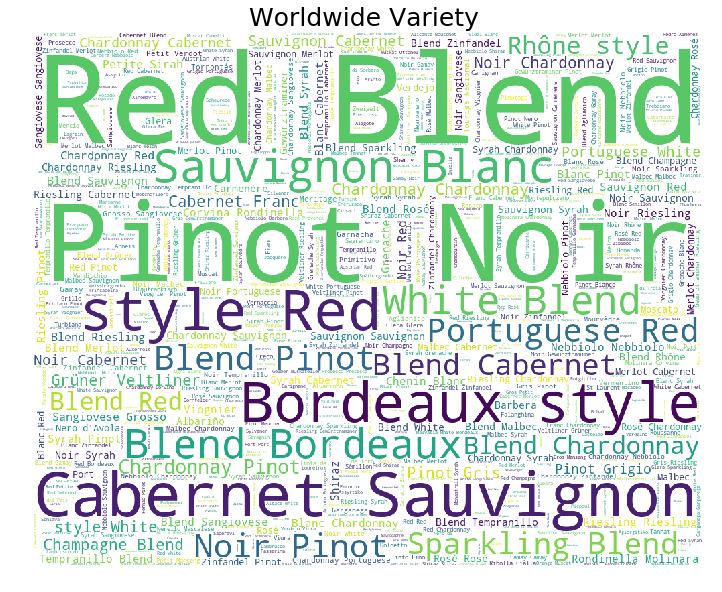

In [18]:
#Word Cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ['']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=1500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(wine['variety'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("Worldwide Variety ",fontsize=25)
plt.axis('off')
plt.show()

In [19]:
#Leave US wine only
US = wine['country'].map(lambda x: str(x).startswith('US'))
#get a boolean list with true being us in country
USwine = wine[US]
#make a list of just us wines
USwine = USwine.dropna()

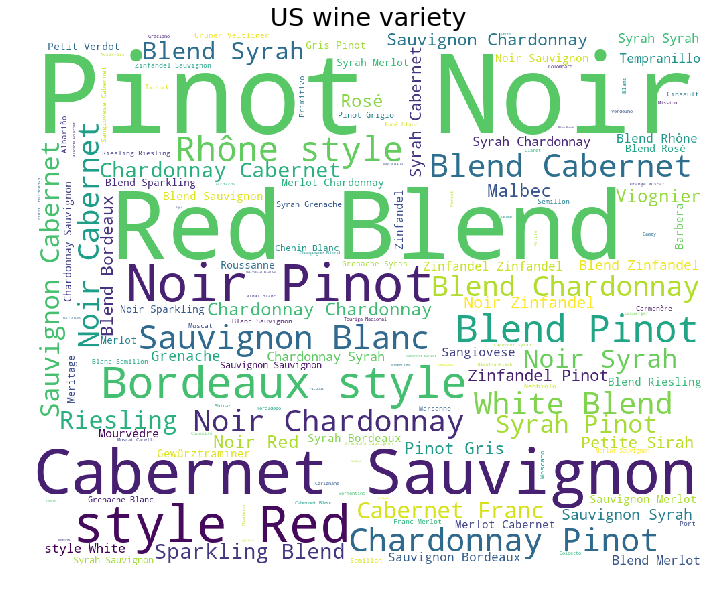

In [20]:
#Word Clond- for US wine--variety
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ['']


stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=1500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(USwine['variety'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("US wine variety",fontsize=25)
plt.axis('off')
plt.show()

### Problem 3: Computer Part  (20 points)

1) Data Collection

2) Implement a small demo/prototype/experiment result figures for the "product" of your data science company. You could use this demo during the pitch

In [21]:
#Cleaning data
parsed_data = wine[wine.duplicated('description', keep=False)]
parsed_data.dropna(subset=['description', 'price'])
dp = parsed_data[['description','price']]
#Transform method taking price as param
def transform_price_simplified(price):
    if price < 50:
        return 1
    elif price >= 50 and price < 200:
        return 2 
    elif price >= 200 and price < 1000:
        return 3 
    elif price >= 1000 and price < 2500:
        return 4 
    else:
        return 5

#Applying transform method and assigning result to new column "price_simplified"
dp = dp.assign(price_simplified = dp['price'].apply(transform_price_simplified))

In [22]:
#Case1: Description to price -RandomForest
X = dp['description']
y = dp['price_simplified']

np.nan_to_num(X)
np.nan_to_num(y)


# Vectorizing model
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# Testing model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))
print(pd.crosstab(index=y_test, columns=predictions, rownames=['Actual'], colnames=['Predicted']))

C:\Users\AishRamPrad\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           1       0.92      1.00      0.96      3135
           2       0.99      0.69      0.81       626
           3       1.00      0.88      0.93         8
           5       1.00      0.66      0.79       237

   micro avg       0.93      0.93      0.93      4006
   macro avg       0.98      0.80      0.87      4006
weighted avg       0.93      0.93      0.92      4006

Predicted     1    2  3    5
Actual                      
1          3133    2  0    0
2           197  429  0    0
3             1    0  7    0
5            78    3  0  156


In [23]:
import sys
for i in range(20, ):
        print("Actual outcome :: {} and Predicted outcome :: {}".format(list(y_test)[i], predictions[i]))

Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 5 and Predicted outcome :: 5
Actual outcome :: 2 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2


In [24]:
#comparison = pd.DataFrame({'actual':y_test.values, 'predicted':predictions.values})  
from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(y_test, predictions)*100,"%")

Accuracy Score: 92.98552171742386 %


In [25]:
#Case2: Variety to price -RandomForest
wine1 = pd.read_csv('C:/Spring19/DS501_IntrotoDS/Case Study Assignment 4/wine-reviews/wine-reviews/winemag-data-130k-v2_Final.csv')
#Cleaning data
parsed_data1 = wine1[wine.duplicated('variety', keep=False)]
parsed_data1.dropna(subset=['variety', 'price'])
dp12 = parsed_data1[['variety','price']]
#Transform method taking price as param
def transform_price_simplified(price):
    if price < 25:
        return 1
    elif price >= 25 and price < 100:
        return 2 
    elif price >= 100 and price < 1000:
        return 3 
    elif price >= 1000 and price < 2500:
        return 4 
    else:
        return 5

#Applying transform method and assigning result to new column "price_simplified"
dp12= dp12.assign(price_simplified = dp12['price'].apply(transform_price_simplified))

C:\Users\AishRamPrad\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [26]:
X1 = dp12['variety']
y1 = dp12['price_simplified']

pd.DataFrame(X1).fillna('Nil')
#np.nan_to_num(X1)
np.nan_to_num(y1)
#np.where(X1.values >= np.finfo(np.float64).max)

# Vectorizing model
vectorizer1 = TfidfVectorizer()
#vectorizer1.fit(X1)
#X1 = vectorizer1.transform(X1)
X1 = vectorizer1.fit_transform(dp12['variety'].values.astype('U'))

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.5, random_state=101)
rfc1 = RandomForestClassifier()
rfc1.fit(X_train1, y_train1)
# Testing model
predictions1 = rfc1.predict(X_test1)
print(classification_report(y_test1, predictions1))
print(pd.crosstab(index=y_test1, columns=predictions1, rownames=['Actual'], colnames=['Predicted']))

C:\Users\AishRamPrad\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           1       0.62      0.55      0.58     24481
           2       0.60      0.77      0.67     29133
           3       0.00      0.00      0.00      1937
           4       0.00      0.00      0.00         8
           5       0.22      0.00      0.00      4114

   micro avg       0.60      0.60      0.60     59673
   macro avg       0.29      0.27      0.25     59673
weighted avg       0.56      0.60      0.57     59673

Predicted      1      2  3   5
Actual                        
1          13581  10890  0  10
2           6667  22448  3  15
3            298   1639  0   0
4              0      8  0   0
5           1441   2665  1   7


C:\Users\AishRamPrad\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AishRamPrad\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AishRamPrad\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
import sys
for i in range(1000, ):
    #if(predictions1[i] != 1):
    print("Actual outcome :: {} and Predicted outcome :: {}".format(list(y_test1)[i], predictions1[i]))

Actual outcome :: 2 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 5 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 1
Actual outcome :: 5 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 5 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcom

Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 3 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 3 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 1
Actual outcome :: 3 and Predicted outcome :: 2
Actual outcome :: 5 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcom

Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 5 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 3 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 5 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcom

Actual outcome :: 2 and Predicted outcome :: 1
Actual outcome :: 5 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 5 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 5 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcom

In [28]:
#comparison = pd.DataFrame({'actual':y_test1.values, 'predicted':predictions1.values})  
from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(y_test1, predictions1)*100,"%")

Accuracy Score: 60.38912070785783 %


In [29]:
#Case3: Variety to price (USA Only)-RandomForest
US = wine['country'].map(lambda x: str(x).startswith('US'))
#get a boolean list with true being us in country
USwine = wine[US]
#make a list of just us wines
USwine = USwine.dropna()


In [30]:
parsed_data2 = USwine[USwine.duplicated('variety', keep=False)]
parsed_data2.dropna(subset=['variety', 'price'])
dp2 = parsed_data2[['variety','price']]
#Transform method taking price as param
def transform_price_simplified(price):
    if price < 25:
        return 1
    elif price >= 25 and price < 50:
        return 2 
    elif price >= 50 and price < 150:
        return 3 
    elif price >= 150 and price < 250:
        return 4 
    elif price >= 250 and price < 400:
        return 5 
    elif price >= 400 and price < 600:
        return 6 
    elif price >= 600 and price < 800:
        return 7 
    elif price >= 800 and price < 1000:
        return 8
    else:
        return 9

#Applying transform method and assigning result to new column "price_simplified"
dp2= dp2.assign(price_simplified = dp2['price'].apply(transform_price_simplified))

In [31]:
X2 = dp2['variety']
y2 = dp2['price_simplified']

#pd.DataFrame(X1).fillna('Nil')
#np.nan_to_num(X1)
#np.nan_to_num(y1)
#np.where(X1.values >= np.finfo(np.float64).max)

# Vectorizing model
vectorizer2 = TfidfVectorizer()
#vectorizer1.fit(X1)
#X1 = vectorizer1.transform(X1)
X2 = vectorizer2.fit_transform(dp2['variety'].values.astype('U'))

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.8, random_state=101)
rfc2 = RandomForestClassifier()
rfc2.fit(X_train2, y_train2)
models = rfc2
# Testing model
predictions2 = rfc2.predict(X_test2)
print(classification_report(y_test2, predictions2))
print(pd.crosstab(index=y_test2, columns=predictions2, rownames=['Actual'], colnames=['Predicted']))

              precision    recall  f1-score   support

           1       0.67      0.35      0.46      4256
           2       0.57      0.64      0.60      8623
           3       0.48      0.59      0.53      4842
           4       0.00      0.00      0.00       135
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

   micro avg       0.55      0.55      0.55     17876
   macro avg       0.25      0.23      0.23     17876
weighted avg       0.56      0.55      0.54     17876

Predicted     1     2     3
Actual                     
1          1488  2241   527
2           706  5509  2408
3            38  1942  2862
4             2    33   100
5             0     4    13
6             0     0     1
7             0     1     1


C:\Users\AishRamPrad\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\AishRamPrad\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AishRamPrad\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AishRamPrad\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)

In [32]:
for i in range(100, ):
    #if(predictions2[i] != 1):
    print("Actual outcome :: {} and Predicted outcome :: {}".format(list(y_test2)[i], predictions2[i]))

Actual outcome :: 2 and Predicted outcome :: 3
Actual outcome :: 3 and Predicted outcome :: 3
Actual outcome :: 3 and Predicted outcome :: 3
Actual outcome :: 1 and Predicted outcome :: 2
Actual outcome :: 3 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 3 and Predicted outcome :: 3
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 3 and Predicted outcome :: 3
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 2 and Predicted outcome :: 3
Actual outcome :: 3 and Predicted outcome :: 3
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 3 and Predicted outcome :: 3
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 3 and Predicted outcome :: 2
Actual outcom

In [33]:
#comparison = pd.DataFrame({'actual':y_test2.values, 'predicted':predictions2.values})  
from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(y_test2, predictions2)*100,"%")


Accuracy Score: 55.15215931975833 %


1) Data Collection

2) Implement a small demo/prototype/experiment result figures for the "product" of your data science company. You could use this demo during the pitch

### Problem 4: Prepare a 90-second pitch and *Present* it in the class (20 points)

1) Prepare the slide(s) for the pitch (10 points)

2) Present it in the class (10 points).

*Advice:  It should really only be one or two slides, but a really good one or two slides!  Also, it is ok to select one person in the team to give the 90-second pitch (though a very organized multi-person 90 second pitch can be very impressive!) *